## European Football Data

Will be performing some simple yet interesting comparisons between different football stats across leagues and players. Data wil be scraped from FBRef.com

In [131]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
# scrape data
url = "https://fbref.com/en/comps/Big5/2023-2024/stats/players/2023-2024-Big-5-European-Leagues-Stats"
df1 = pd.read_html(url)[0]

In [133]:
# create data frame and drop multi-level header
df = pd.DataFrame(df1)
df.columns = df.columns.droplevel(0)

In [134]:
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23,2000,20,13,...,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06,Matches
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22,2000,30,14,...,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27,Matches
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19,2003,7,1,...,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19,Matches
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17,2006,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35,1987,31,31,...,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09,Matches


In [135]:
df.shape

(2966, 38)

In [136]:
# create the league column and remove the weird line breaks
df[['an', 'comp']] = df['Comp'].str.split(" ", n=1, expand=True)
df = df.drop(columns=['an', 'Comp'])
df = df[df['Player'] != 'Player']
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches,comp
0,1,Max Aarons,eng ENG,DF,Bournemouth,23,2000,20,13,1237,...,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06,Matches,Premier League
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,22,2000,30,14,1267,...,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27,Matches,Bundesliga
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,19,2003,7,1,101,...,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19,Matches,Bundesliga
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,17,2006,1,0,4,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches,Ligue 1
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,35,1987,31,31,2781,...,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09,Matches,Ligue 1


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2852 entries, 0 to 2965
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rk        2852 non-null   object
 1   Player    2852 non-null   object
 2   Nation    2848 non-null   object
 3   Pos       2852 non-null   object
 4   Squad     2852 non-null   object
 5   Age       2848 non-null   object
 6   Born      2848 non-null   object
 7   MP        2852 non-null   object
 8   Starts    2852 non-null   object
 9   Min       2852 non-null   object
 10  90s       2852 non-null   object
 11  Gls       2852 non-null   object
 12  Ast       2852 non-null   object
 13  G+A       2852 non-null   object
 14  G-PK      2852 non-null   object
 15  PK        2852 non-null   object
 16  PKatt     2852 non-null   object
 17  CrdY      2852 non-null   object
 18  CrdR      2852 non-null   object
 19  xG        2852 non-null   object
 20  npxG      2852 non-null   object
 21  xAG       2852 non-

In [139]:
# convert key metrics to float
df['90s'] = df['90s'].astype(float)
df['PrgC'] = df['PrgC'].astype(float)
df['PrgP'] = df['PrgP'].astype(float)
df['Min'] = df['Min'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2852 entries, 0 to 2965
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rk        2852 non-null   object 
 1   Player    2852 non-null   object 
 2   Nation    2848 non-null   object 
 3   Pos       2852 non-null   object 
 4   Squad     2852 non-null   object 
 5   Age       2848 non-null   object 
 6   Born      2848 non-null   object 
 7   MP        2852 non-null   object 
 8   Starts    2852 non-null   object 
 9   Min       2852 non-null   int32  
 10  90s       2852 non-null   float64
 11  Gls       2852 non-null   object 
 12  Ast       2852 non-null   object 
 13  G+A       2852 non-null   object 
 14  G-PK      2852 non-null   object 
 15  PK        2852 non-null   object 
 16  PKatt     2852 non-null   object 
 17  CrdY      2852 non-null   object 
 18  CrdR      2852 non-null   object 
 19  xG        2852 non-null   object 
 20  npxG      2852 non-null   object 
 

In [140]:
# min 1000 minutes played, remove GK for outfielder comparisons
df2 = df[(df['Min'] >= 1000) & (df['Pos'] != 'GK')]

In [141]:
# select only metrics of interest
df2 = df2[['Player', 'Pos', 'Squad', 'comp', 'Min', '90s', 'PrgC', 'PrgP']]

In [142]:
df2.head()

,Player,Pos,Squad,comp,Min,90s,PrgC,PrgP
0,Max Aarons,DF,Bournemouth,Premier League,1237,13.7,22.0,43.0
1,Brenden Aaronson,"MF,FW",Union Berlin,Bundesliga,1267,14.1,37.0,56.0
4,Yunis Abdelhamid,DF,Reims,Ligue 1,2781,30.9,36.0,137.0
5,Salis Abdul Samed,MF,Lens,Ligue 1,1519,16.9,9.0,78.0
7,Laurent Abergel,MF,Lorient,Ligue 1,2860,31.8,38.0,194.0


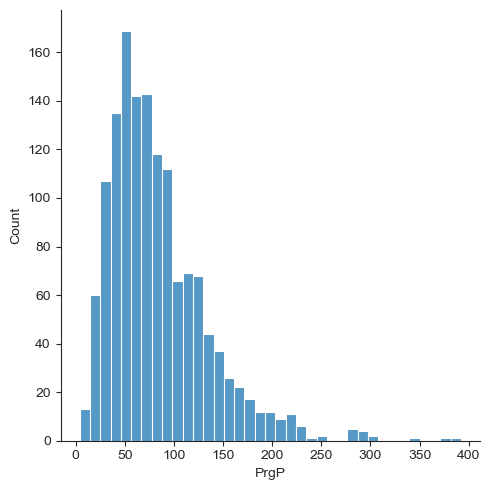

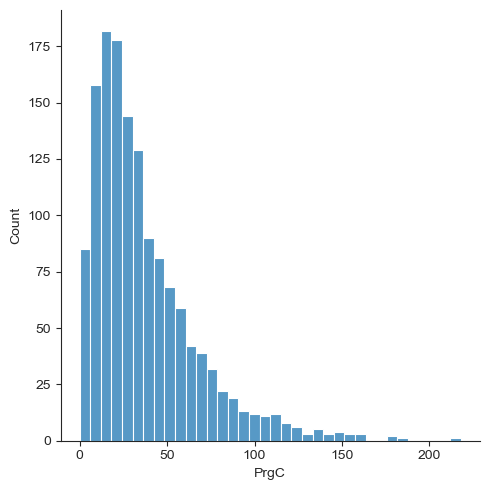

In [144]:
# quick distribution of progressive passes/carries
sns.displot(data=df2, x='PrgP')
sns.displot(data=df2, x='PrgC')
plt.show()

In [145]:
# per90 - convert metrics to a per 90 metric
df2['prgc90'] = df2['PrgC'] / df2['90s']
df2['prgp90'] = df2['PrgP'] / df2['90s']

c90_mean = df2['prgc90'].mean()
p90_mean = df2['prgp90'].mean()

print(c90_mean, p90_mean)

1.7608878436427522 3.8415756862835524


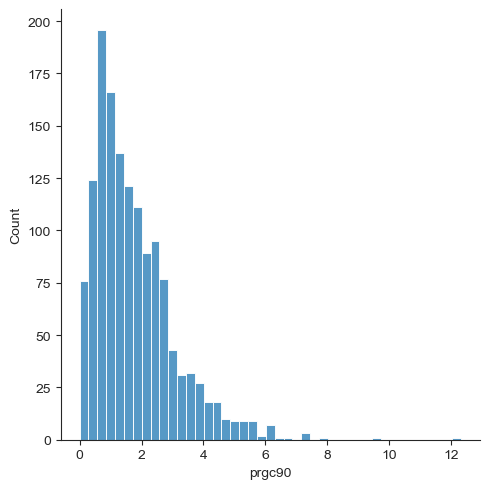

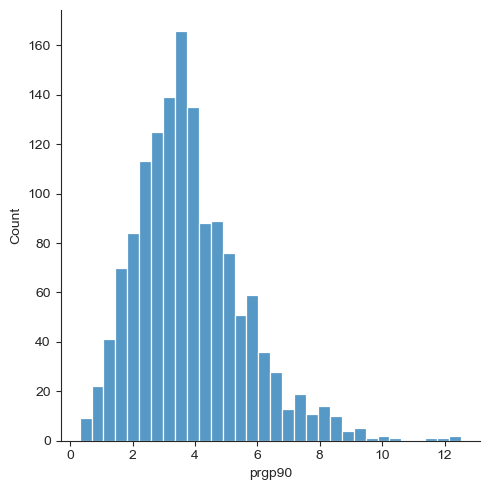

In [148]:
sns.displot(data=df2, x='prgc90')
sns.displot(data=df2, x='prgp90')
plt.show()

In [149]:
# choose colours for palette
colours = ["#442288", "#6CA2EA", "#B5D33D", "#CC9900", "#EB7D5B"]

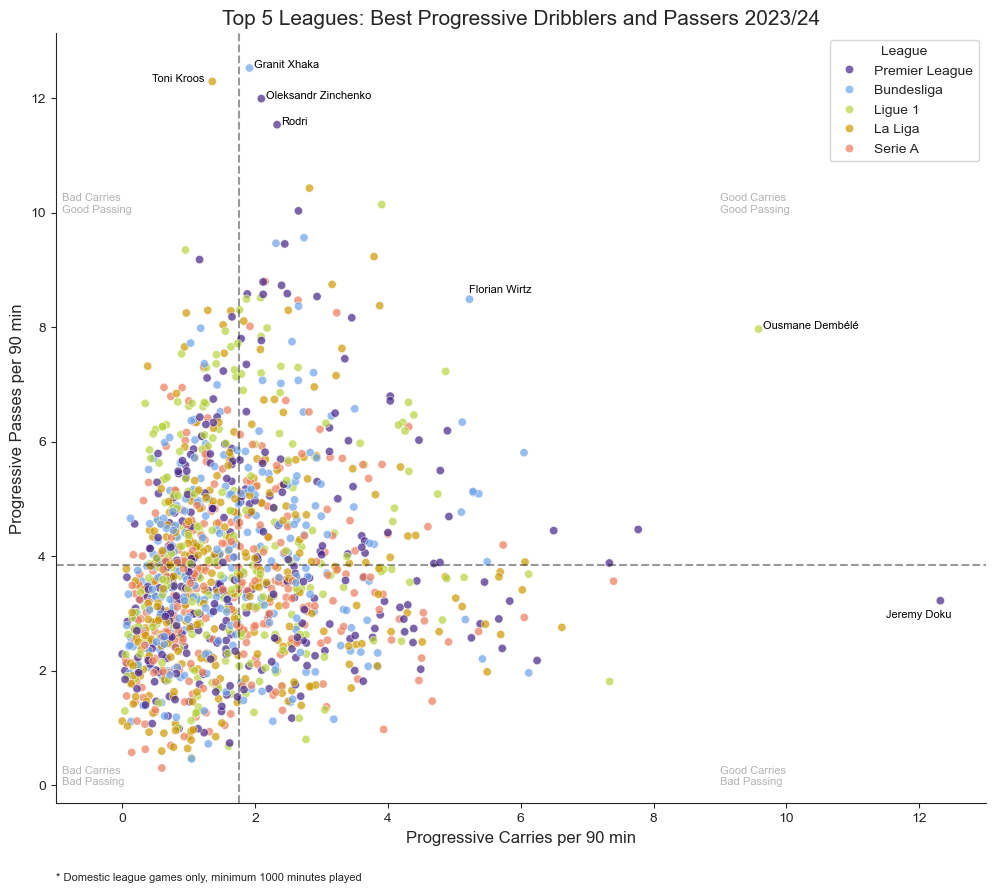

In [150]:
# create graph
plt.figure(figsize=(12,10))
sns.scatterplot(data=df2, x='prgc90', y='prgp90', hue='comp', palette=colours, alpha=0.7)
sns.set_style("ticks")
sns.despine()
plt.xlim(-1, 13)

# mean lines
plt.axvline(x=c90_mean, linestyle = '--', color="black", alpha = 0.4)
plt.axhline(y=p90_mean, linestyle = '--', color="black", alpha = 0.4)

# labels
plt.xlabel('Progressive Carries per 90 min', fontsize=12)
plt.ylabel('Progressive Passes per 90 min', fontsize=12)
plt.title("Top 5 Leagues: Best Progressive Dribblers and Passers 2023/24", fontsize=15)
plt.figtext(0.125, 0.032, "* Domestic league games only, minimum 1000 minutes played", wrap=True, horizontalalignment='left', fontsize=8)
plt.legend(title='League')

# ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# player annotations
plt.text(x=9.65, y=7.964072, s='Ousmane Dembélé', horizontalalignment='left', fontsize=8, color='black')
plt.text(x=11.5, y=2.93, s='Jeremy Doku', horizontalalignment='left', fontsize=8, color='black')
plt.text(x=0.45, y=12.28, s='Toni Kroos', horizontalalignment='left', fontsize=8, color='black')
plt.text(x=2.39, y=11.533742, s='Rodri', horizontalalignment='left', fontsize=8, color='black')
plt.text(x=1.98, y=12.523962, s='Granit Xhaka', horizontalalignment='left', fontsize=8, color='black')
plt.text(x=2.17, y=11.98, s='Oleksandr Zinchenko', horizontalalignment='left', fontsize=8, color='black')
plt.text(x=5.227, y=8.6, s='Florian Wirtz', horizontalalignment='left', fontsize=8, color='black')

# grid annotations
plt.text(x=9, y=0, s='Good Carries \nBad Passing', horizontalalignment='left', fontsize=8, color='black', alpha = 0.3)
plt.text(x=9, y=10, s='Good Carries \nGood Passing', horizontalalignment='left', fontsize=8, color='black', alpha = 0.3)
plt.text(x=-0.9, y=0, s='Bad Carries \nBad Passing', horizontalalignment='left', fontsize=8, color='black', alpha = 0.3)
plt.text(x=-0.9, y=10, s='Bad Carries \nGood Passing', horizontalalignment='left', fontsize=8, color='black', alpha = 0.3)
plt.show()

Some interesting findings arise here:
- Star wingers in Dembele and Doku have a much greater number of carries per 90 than the rest of the players
- Wingers are likely to dribble more, take on defenders 1 on 1, and attack from the wide areas
- No surprise wingers tend to be have higher carry rate  

- Leaders in central midfielder positions, Kroos, Xhaka, Rodri, and (somewhat) Zinchenko lead the progressive passing stat
- CMs are typically the core of the team to receive the ball and pass forward to strikers, wingers or advanced midfielders
- Zinchenko, who plays left back consistently, also contributed to progressive passing being behind midfield and forward lines  

- Wirtz holds a combination of strong stats in both progressive carries and passes
- Playing in an advanced midfield role, such as CAM or holding forward, gets this blend of receiving the ball to carry and dribble at defenders
- But also comes deep enough to spread passes outwide to wingers or to an advanced forward